# Transformer from scratch

## Overview

- **input**
    - must be inputted as an **array of real numbers** 
        - ex. a list of numbers, 2d array, higher dimension array (TENSOR)
    - think of it as: progressively transformed into many distinct layers (each layer is an array of real numbers), until get to final layer (output)

    ex. final layer in text-processing model (ex. GPT) is a list of numbers representing the probability distrubition of all possible next tokens

- **desired output:**
    - a probability distribution over all tokens that might come next

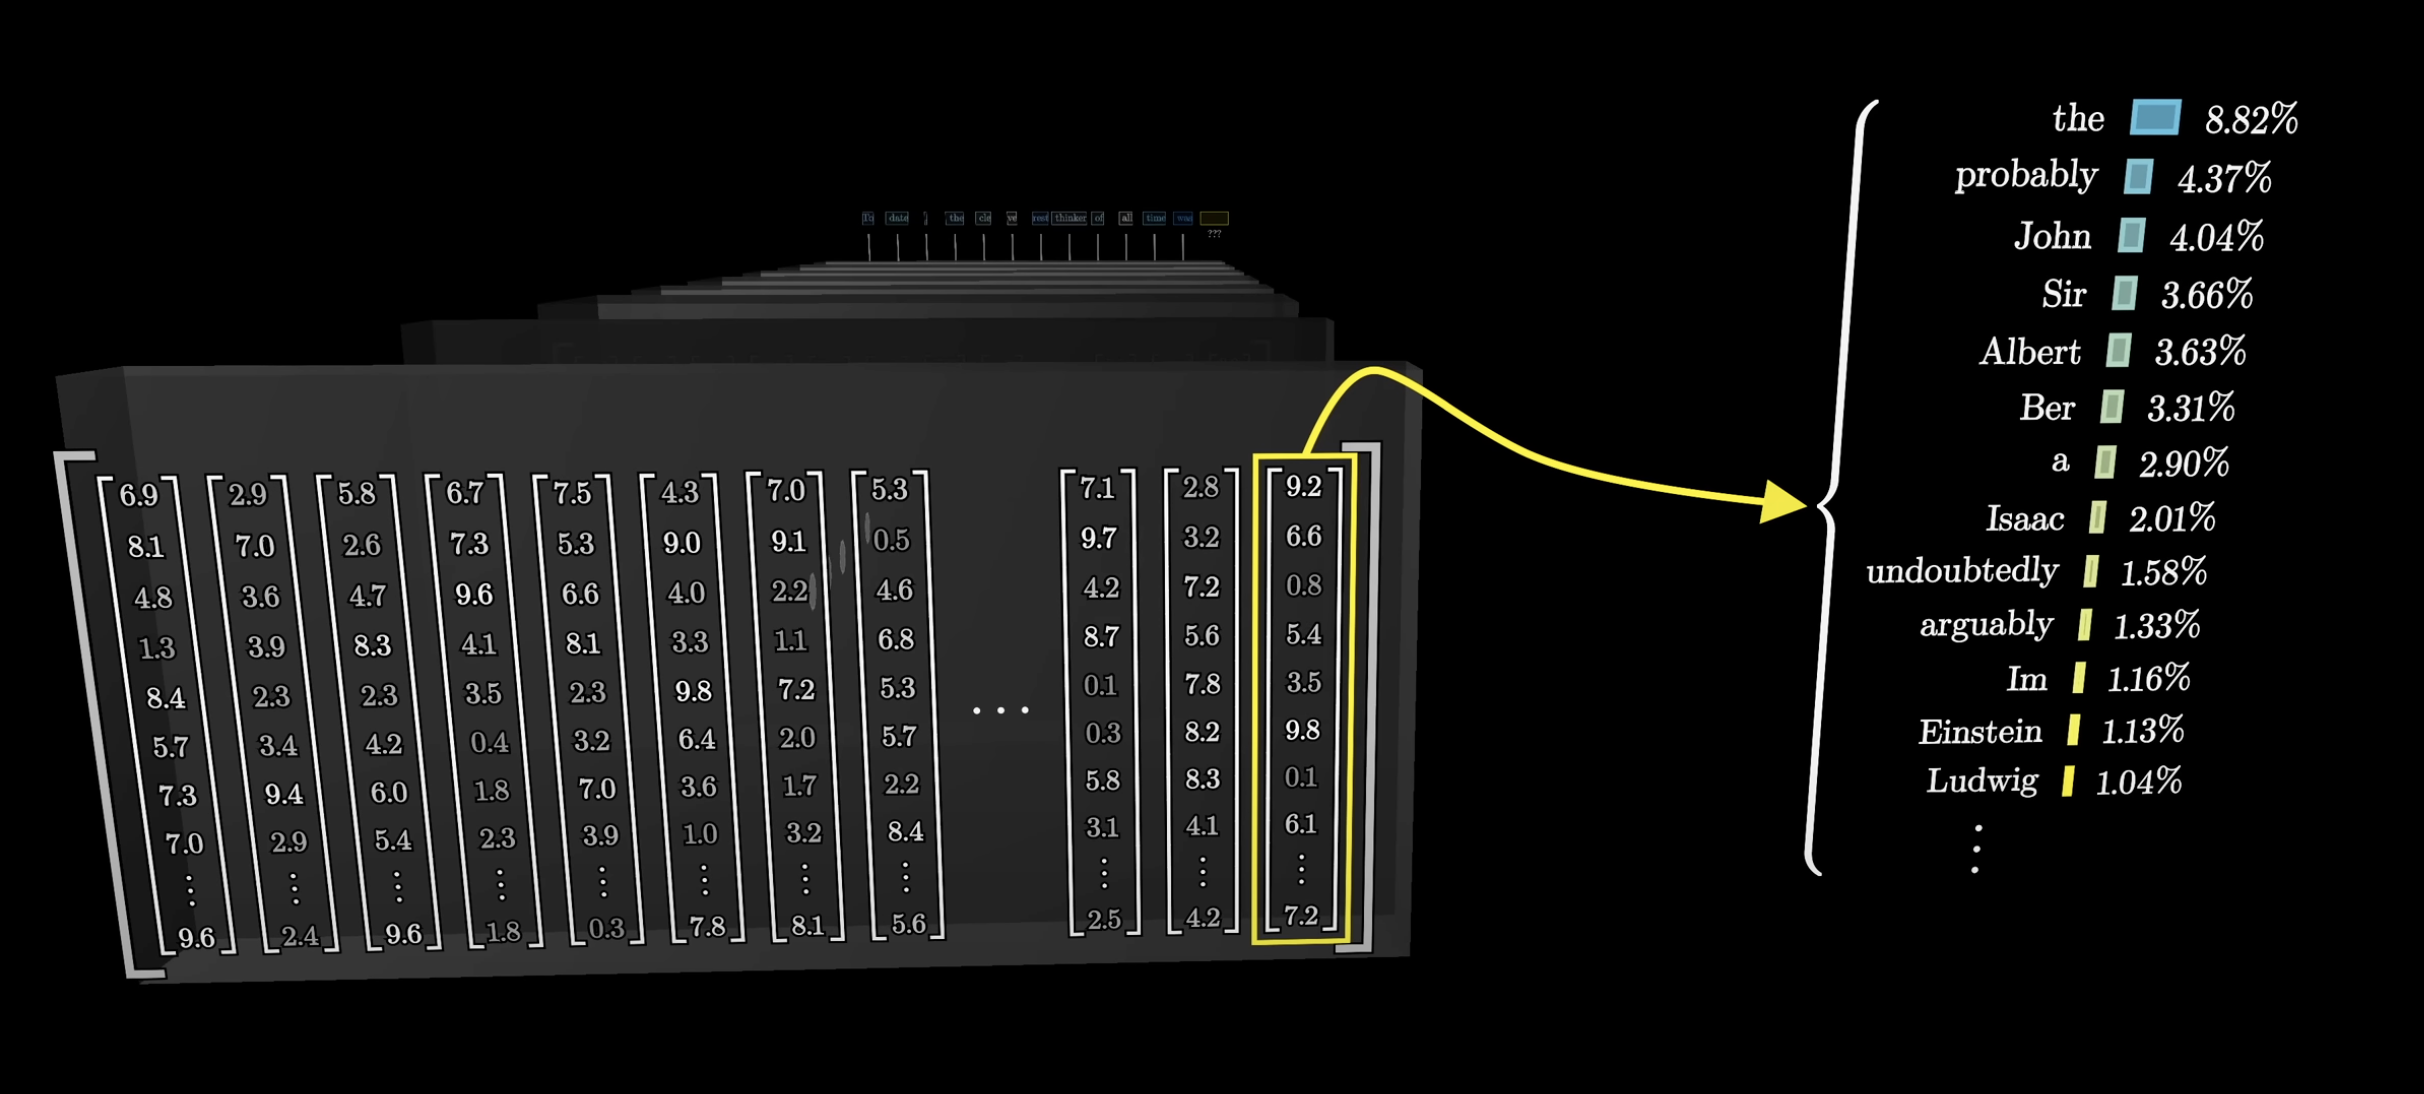

In [2]:
from IPython.display import Image, display
display(Image(filename='assets/4-outputEX.png', width=500, height=500))

## Tokens

Tokens are "little pieces" of information (ex. words, combinations of words, sounds, images). 
- Every token is associated with a vector (some list of numbers)
    - encodes meaning of that piece
- ex. if consider these vectors as coordinates, words with similar meanings tend to land near each other


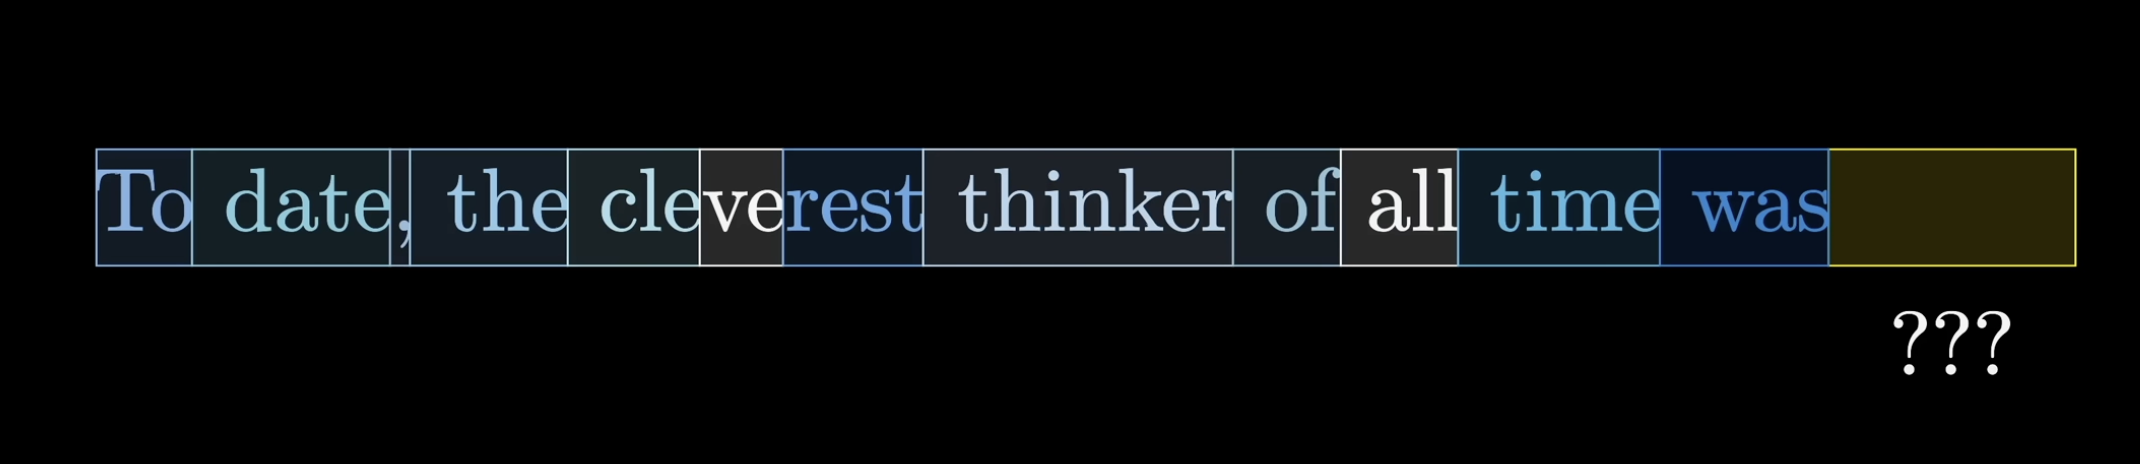

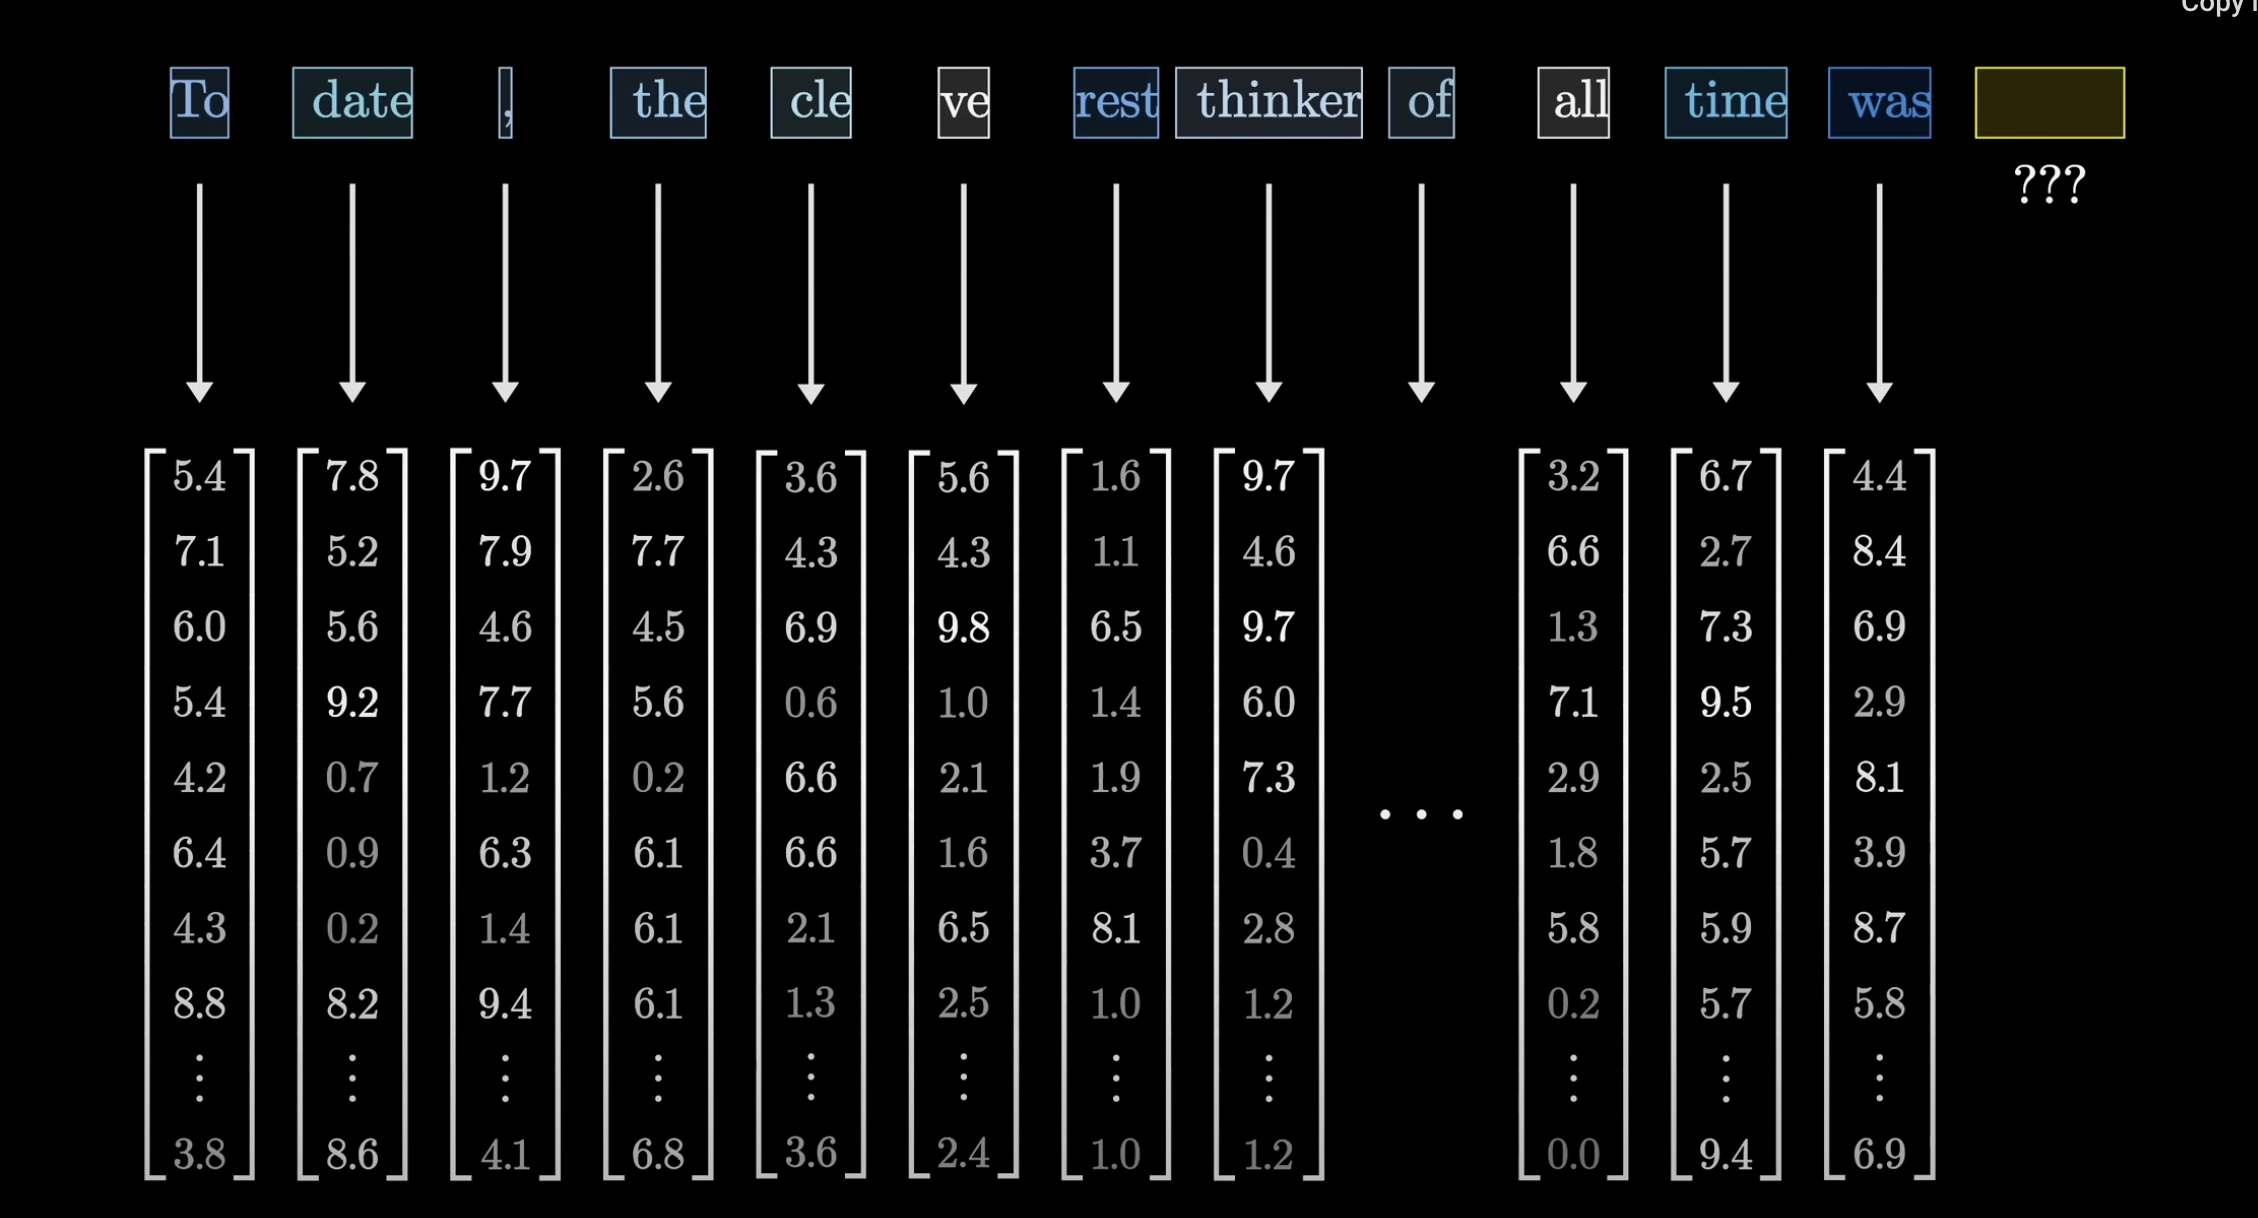

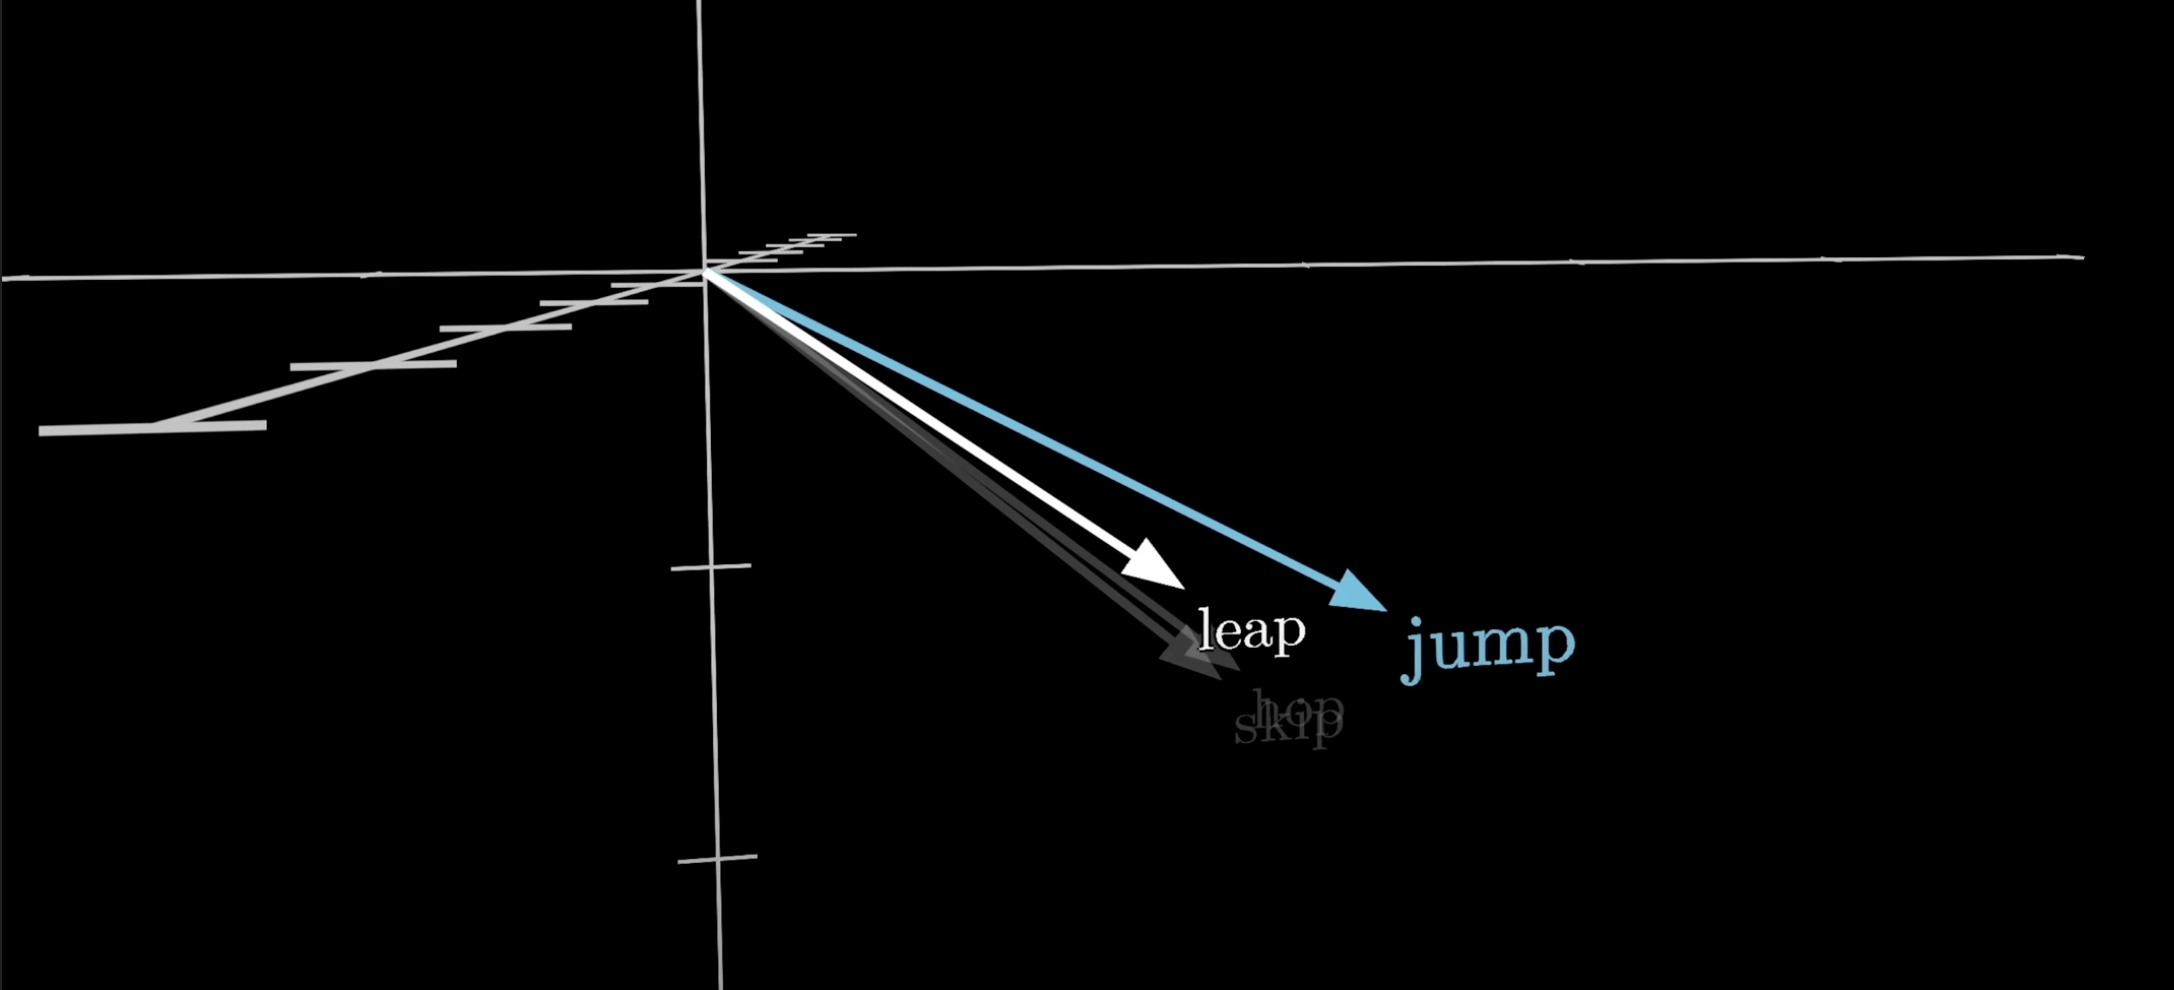

In [3]:
from IPython.display import Image, display
display(Image(filename='assets/2-tokens.png', width=500, height=500))
display(Image(filename='assets/3-tokenvectors.png', width=500, height=500))
display(Image(filename='assets/1-coordinateTokens.png', width=500, height=500))

## Embeddings

**Words that are used and occur in the same contextxt tend to purport similar meanins (distributional semantics)**

Break up the input into little chunks, then into vectors. These chunks are called **tokens**.

The model has predefined vocabulary (list of all possible words). 
- Embedding matrix (W_E): single column for each word. These columns determine what word turns into in that fiirst step.

- The dimensions of the embedding space can be very high (ex. 12,288) 

- theoretically, *E(man) - E(woman) ~= E(king) - E(queen)*

- the dot product of two vectors, is a measure of how well they align

*see `Embeddings/` for more on embeddings!*

*Below is an image of the embedding matrix. Each word corresponds to a specific vector, with no reference to its context.* <br>
*It is the `Attention block`'s responsibility to update a word's vector with its context. (to be discussed later)*

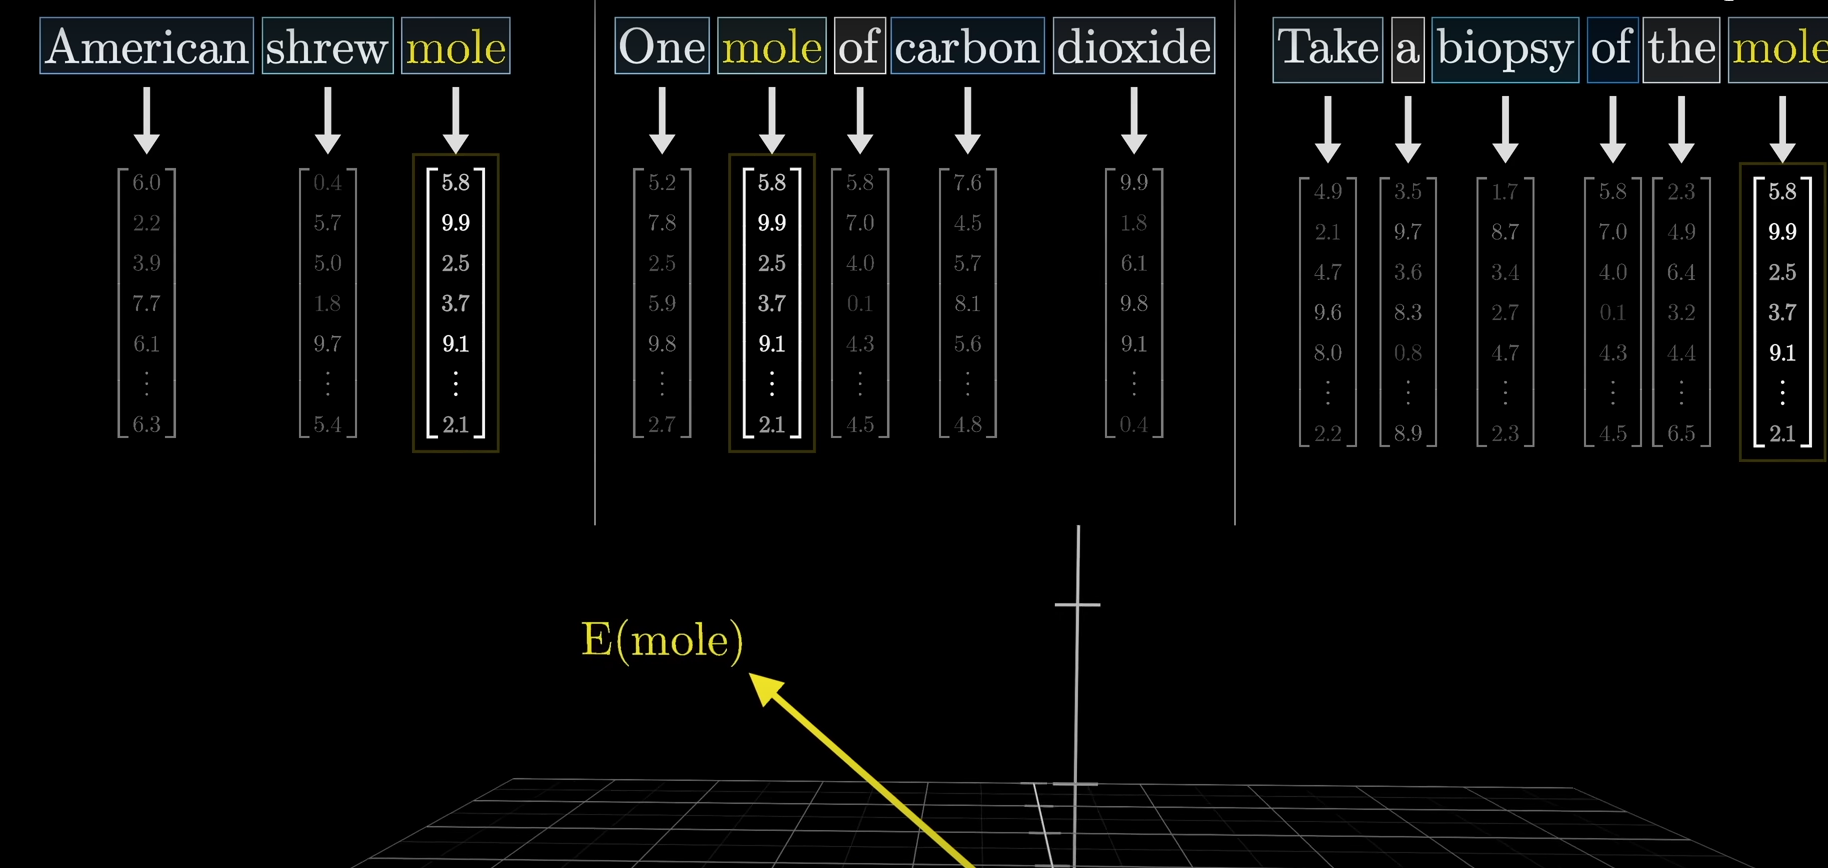

In [4]:
display(Image(filename='assets/10-embeddingmatrix.png', width=700, height=700))

### Positional Encoders

Positional encoding gives the model info about the **order of words in a sequence**. In other words, for example, where a specific word is positioned in a sentence.

A **fixed** positional encoding **vector** is **added to each word's embedding.**

<br>
<br>
NOTE: word embeddings & positional embeddings are separate. Word embeddings capture SEMANTIC MEANING, while positional encodings capture the ORDER OF TOKENS

### Unembedding

in determining desired output of the transformer (a probability distribution of all possible tokens that can come next in the generating text), a well trained network on the particular dataset is able to determine the next best possible token by:

1. Using a matrix (embedding matrix `W_u`) that maps the last vector/embedding in the context to a list of 50k values (one for each token in the vocabulary)
2. Function that normalizes this into a probability distribution (`softmax`)

## Softmax (normalization)

The desired output of a transformer is a **probability distribution** of all possible tokens that can come next in the generating text

A probability distribution is defined as a sequence of numbers between 0-1, and that sums to 1. `Softmax` can convert any sequence of numbers into these criterias

[0.03511903 0.25949646 0.70538451]


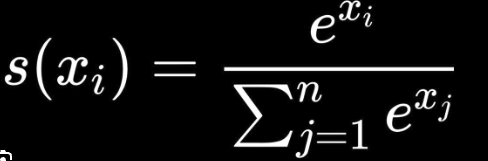

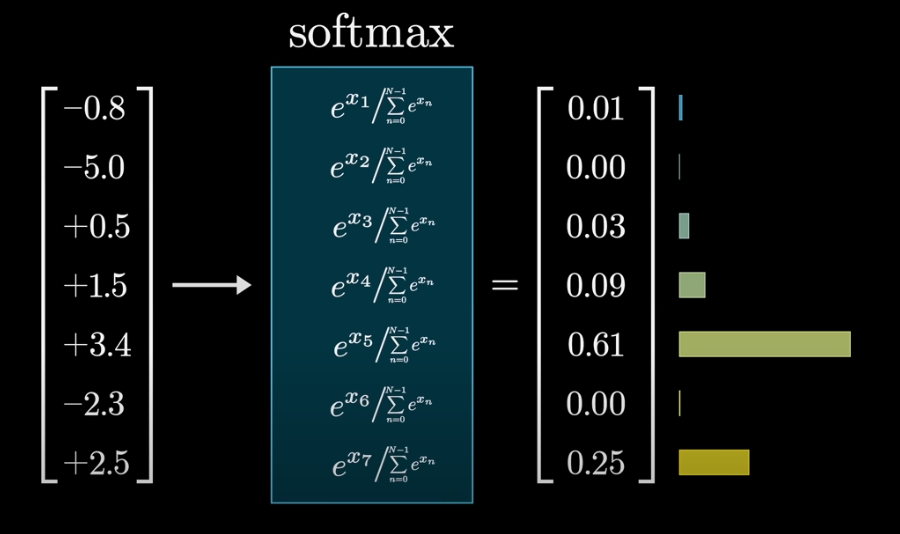

In [5]:
import numpy as np

# given a sequence of numbers, each term `i`

# softmax eqn:      e^i/(sum of e^i for all terms)     

# probability distribution: 
    # 1) all numbers are positive numbers 0-1  (e^i)  
    # sum of all numbers = 1 (sum of e^i of all terms)

seq = [2, 4, 5]
print(np.exp(seq)/np.sum(np.exp(seq)))

display(Image(filename='assets/8-softmaxEqn.png', width=700, height=700))
display(Image(filename='assets/6-softmax.png', width=700, height=700))

### Temperature

With softmax, the constant `T` added to the denominator of the exponents of `e` in the softmax equation can cause more creative generated text, as it creates the **softmax outputs to be LESS extreme towards 0 and 1**. This enables more unique text to be generated, and different for each generation.

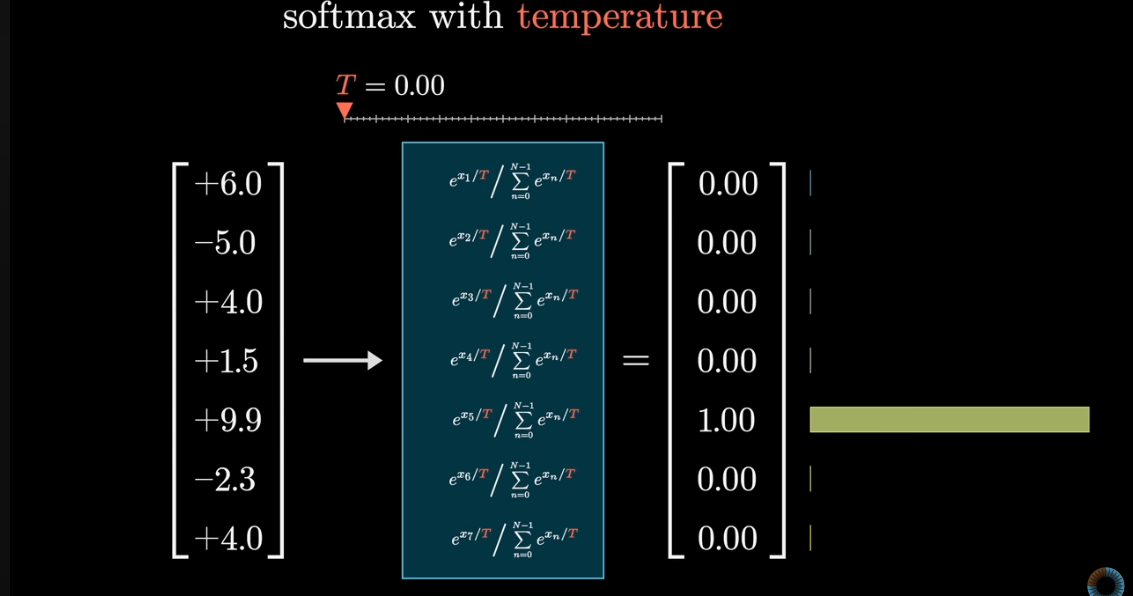

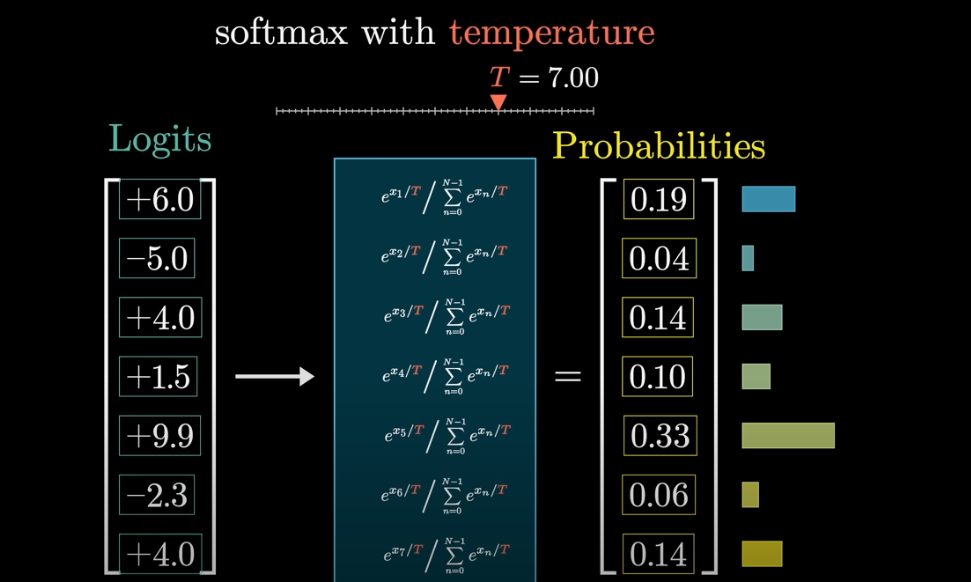

In [6]:
display(Image(filename='assets/7-softmaxT.png', width=600, height=600))
display(Image(filename='assets/9-logits.png', width=600, height=600))


## Attention Block

Updates a word's embedding vector in referencing to its context. Enables to move information in one embedding to another.
<br><br>
Prior to Attention, the embedding vector of every word is consistent, regardless of its context (embedding matrix, see below). Therefore, the motivation of Attention is to update a word's embedding vector in referencing to its context (i.e. in reference to its surrounding tokens).


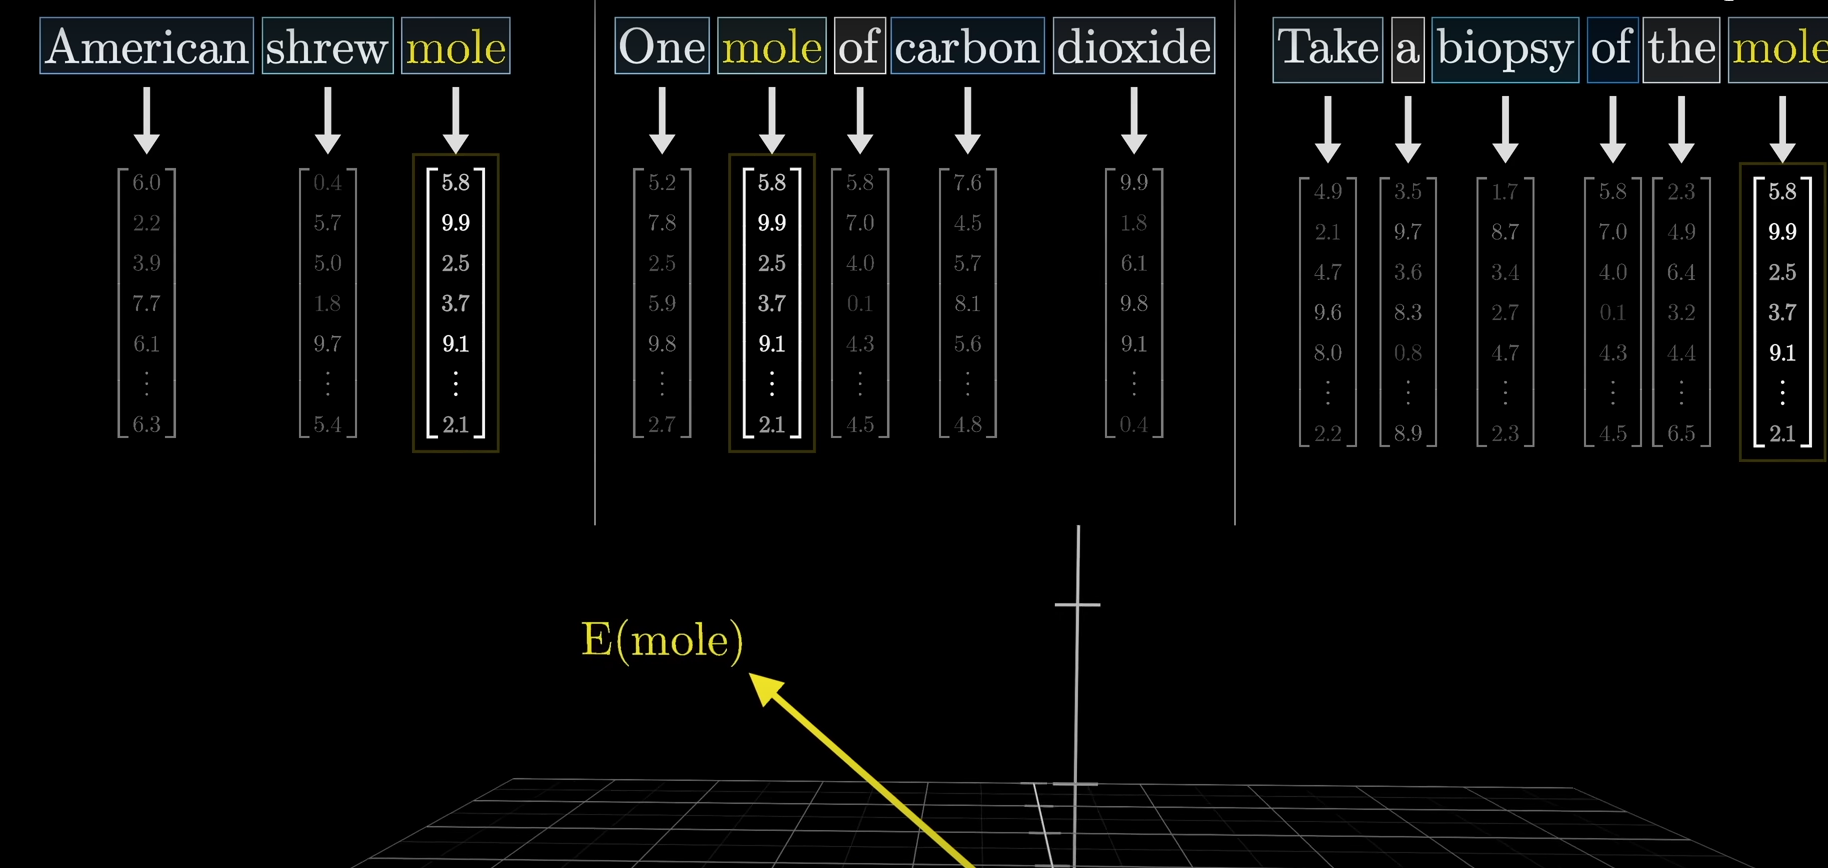

In [7]:
display(Image(filename='assets/10-embeddingmatrix.png', width=700, height=700))

The computation performed to produce a prediction of the next token is entirely a function of the last vector in the sequence.
<br><br>
The final vector in the sequence, embedding initially the last word, would have had to be **updated by all the attention blocks to represent much mure than any individual word**, somehow **encoding all the information in the context window that is relevant in predicting the next word**.

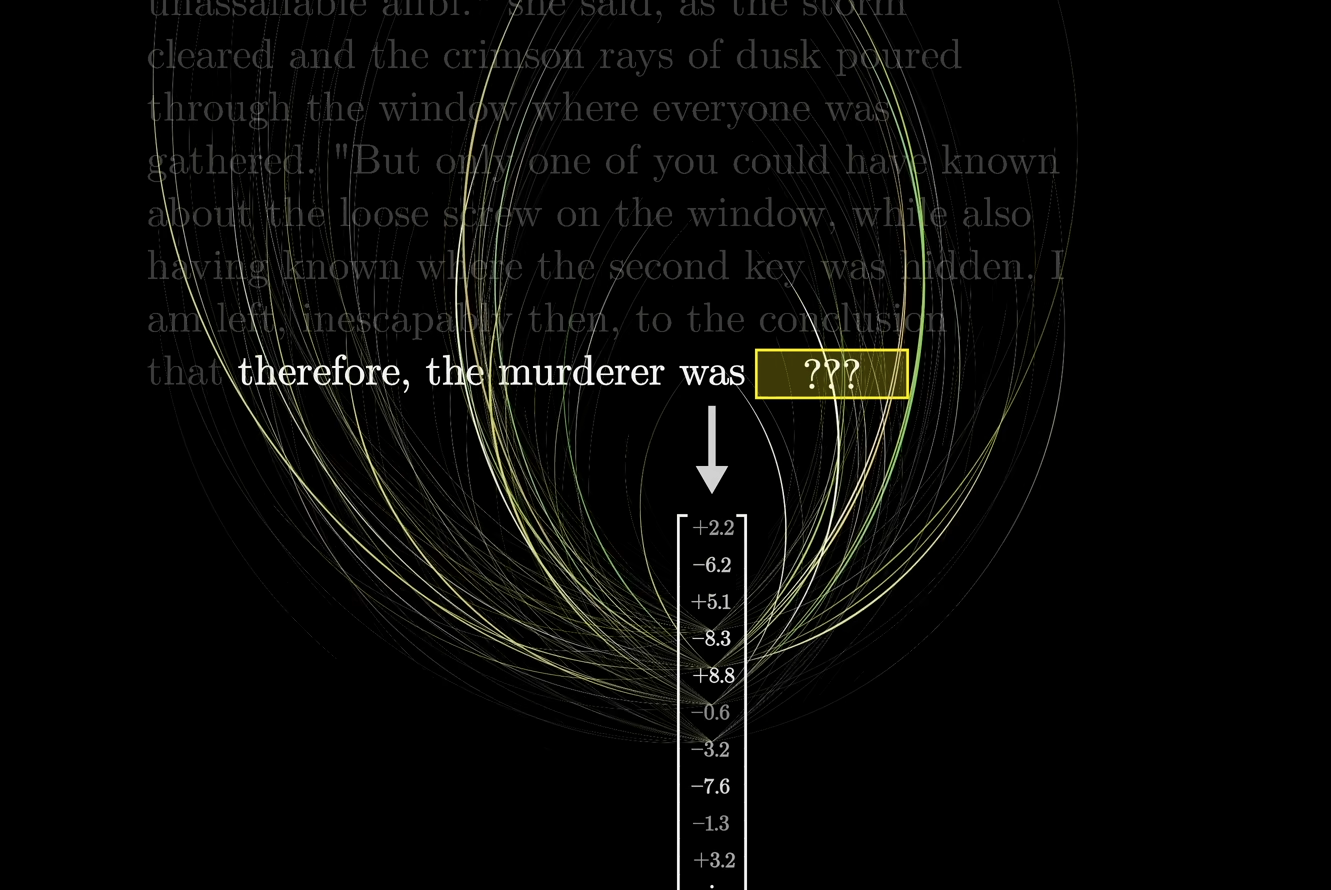

In [9]:
display(Image(filename='assets/12-attentionlastvector.png', width=700, height=700))

An Attention block is made up of many Attention heads

*Credit to 3blue1brown for the visuals!*